In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
df_churn = pd.read_csv("customer_churn.csv")

The dataset comes from the Kaggle.com, and it is related to telecom company. The classification goal is to predict whether the customer will churn(1/0). The dataset can be downloaded from here

Predict variable (desired target): y — has the customer churned? (binary: “1”, means “Yes”, “0” means “No)

In [3]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.shape

(7043, 21)

In [5]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Replacing Empty space with NAN

In [6]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df_churn[i]=df_churn[i].replace(" ",np.nan)

### Checking for Missing Values

In [7]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Feature 'TotalCharges' has 11 NaNs or missing values.So lets drop those missing values

In [8]:
df_churn=df_churn.dropna()

### Viewing unique label/data types in each column

In [9]:
for item in df_churn.columns:
    print(item)
    print (df_churn[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

## DATA MANIPULATION

### Encoding Categorical variables

In [10]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    df_churn[i]=df_churn[i].replace({"Yes":1,"No":0})

#Encoding column 'gender'
df_churn['gender']=df_churn['gender'].replace({"Male":1,"Female":0})

## Getting dummy for other categorical features

In [11]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df_churn[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_churn.drop(cc, axis=1, inplace=True)
    df_churn = df_churn.join(dummies)

In [12]:
df_churn.drop('customerID',axis=1,inplace=True)


In [13]:
df_churn.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [14]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


## Target variable

### Looking at distribution of target variable

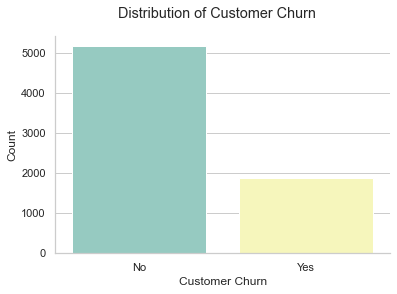

In [15]:
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=df_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

In [16]:
#Converting the target variable into numeric (Yes:1, No:0)
df_churn['Churn']=df_churn['Churn'].replace({"Yes":1,"No":0})

In [17]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


### Examining correct corelation of churn with other features

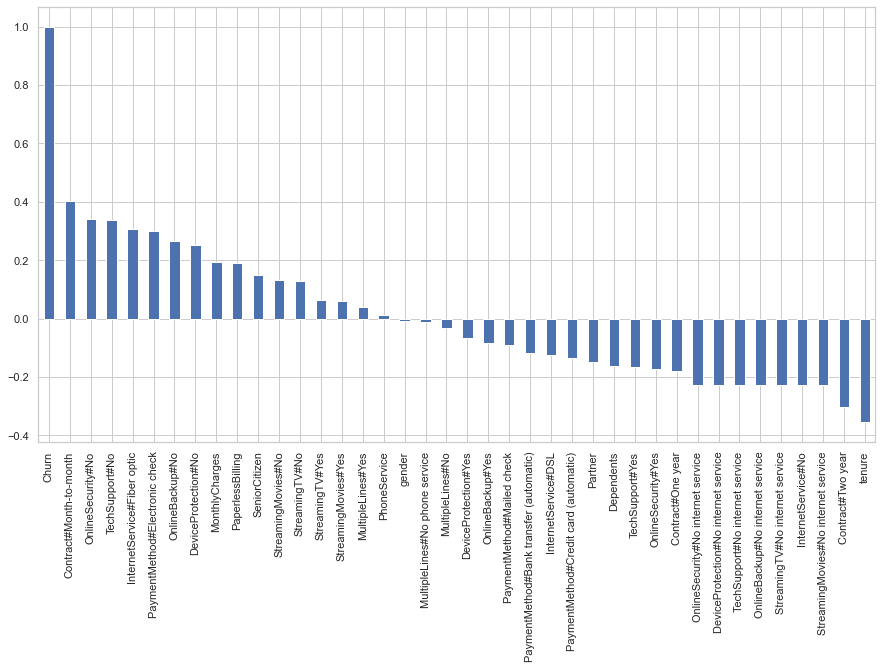

In [18]:
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Observations

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## Examining correlation features with each other

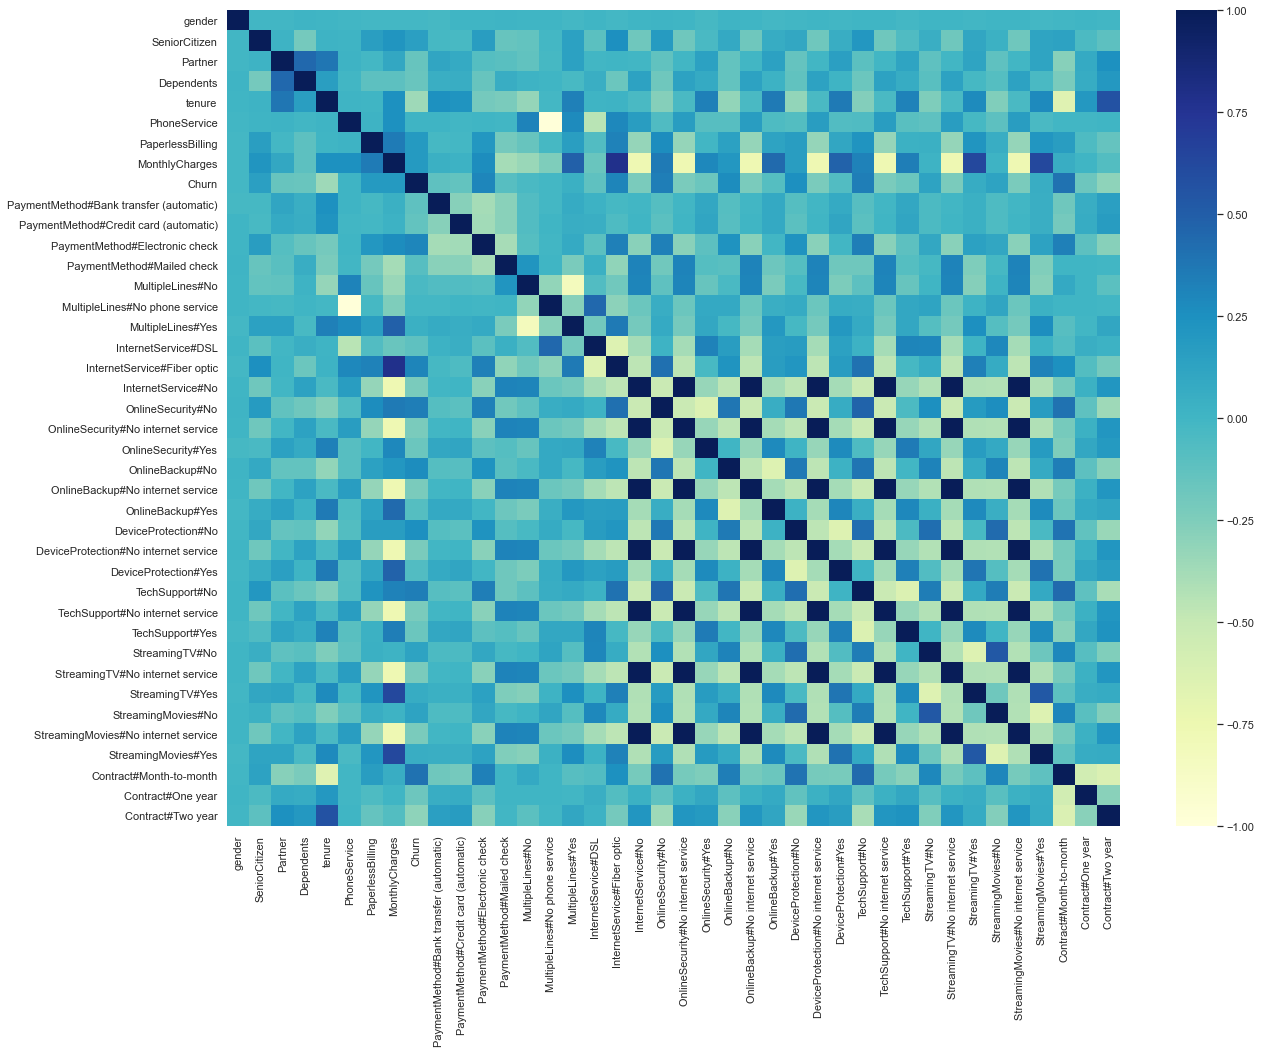

In [19]:
corr=df_churn.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")


The 'No Internet service' in various categorical variables seem to be strongly correlated with each other.Their coorelation with the target variable is on the lower side.So I won;t worry right now about their effect the model.I can did into it deeper once I have a final model.

# Testing Models

In [20]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

import numpy as np

## Target variable

In [21]:
count_no_churn = (df_churn['Churn'] == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (df_churn['Churn']==1).sum()
print("Number of customers who churnes:",count_yes_churn)
pct_of_no_churn = count_no_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who didn't churn:", pct_of_no_churn*100)
pct_of_yes_churn = count_yes_churn/(count_no_churn+count_yes_churn)
print("percentage of customers who churned:", pct_of_yes_churn*100)

Number of customers who didn't churn: 5163
Number of customers who churnes: 1869
percentage of customers who didn't churn: 73.42150170648463
percentage of customers who churned: 26.578498293515356



BALANCING THE TARGET VARIABLE

As we saw earlier, our target variable IS unbalanced.So I am going to balance the target variable with SMOTE (Synthetic Minority Oversampling Technique). With our training data created, I’ll up-sample minority sample( in our case the 'yes_churn' (customers who churn) sample using the SMOTE algorithm. At a high level, SMOTE:

1.Works by creating synthetic samples from the minor class ( yes-churn) instead of creating copies.

2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

## Splitting dataset

In [22]:

from sklearn.model_selection import train_test_split
X = df_churn.loc[:, df_churn.columns != 'Churn']
y = df_churn.loc[:, df_churn.columns == 'Churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7032, 40)
Shape of y: (7032, 1)


In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train['Churn'].shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test["Churn"].shape)

Number transactions X_train dataset:  (4922, 40)
Number transactions y_train dataset:  (4922,)
Number transactions X_test dataset:  (2110, 40)
Number transactions y_test dataset:  (2110,)


## oversampling with smote

In [24]:

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train["Churn"])

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (7216, 40)
After OverSampling, the shape of train_y: (7216,) 

After OverSampling, counts of label '1': 3608
After OverSampling, counts of label '0': 3608


 Now we have a perfect balanced data!I only over-sampled on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

## FITTING DIFFERENT MODELS

Loading the Models

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier)
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12)
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params)
    grid.fit(X_train_res, y_train_res)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid

knn: best score: 0.7936541485017938
logistic: best score: 0.8209673982527168
tree: best score: 0.8044740777427759
forest: best score: 0.8176346600169314


# Random forest

Using Gridsearch to find the best parameters

In [27]:
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [29]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

## Fitting Randon Forest Model with best parameters

In [30]:
rfc_best=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50, max_depth=8, criterion='gini')

In [31]:
rfc_best.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [32]:
y_pred_rfc=rfc_best.predict(X_test)

## Evaluating Random Forest Model

In [33]:
from sklearn.metrics import confusion_matrix


confusion_matrix_forest = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_forest)

[[1244  311]
 [ 153  402]]


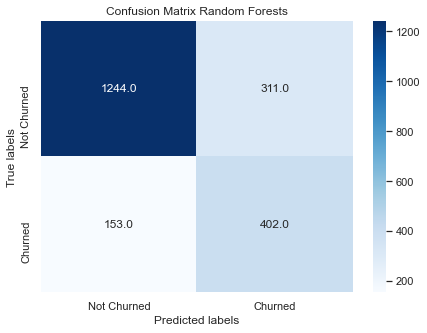

In [34]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_forest,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests');

## Printing the classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1555
           1       0.56      0.72      0.63       555

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110



## calculating Area under curve

In [36]:

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

y_pred_rfc=rfc_best.predict(X_test)
y_score_rfc = rfc_best.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_rfc)
roc_auc_forests = auc(fpr, tpr)
print(roc_auc_forests)

0.8429170649749429


## Logistic Regression Final Model

It’s clear that false negatives are substantially more costly than false positives (Discussed Under Cost Evaluation).Out of all the models tested,Logistic regression has the highest recall for class 1 (Customers Churned) and least numnber of false negatives.So I selected Logistic regression as my final model.

## using gridsearch to find the best parameters

In [37]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

## more efficient parameter tuning using gridsearchcv

In [38]:
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = np.logspace(-3,6, 12)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit it to the data
best_model = logreg_cv.fit(X_train_res, y_train_res)

#examine the best model
print(best_model.best_score_)
print(best_model.best_params_)
print(best_model.best_estimator_)

0.8265284442583208
{'C': 81.11308307896873}
LogisticRegression(C=81.11308307896873)


## Fitting Logistic Regression with best parameters

In [39]:

best_lr1 = LogisticRegression(C=0.8)
best_lr1.fit(X_train_res, y_train_res)

LogisticRegression(C=0.8)

In [40]:
from sklearn.metrics import confusion_matrix
y_pred_log = best_lr1.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)

[[1261  294]
 [ 173  382]]


## printing the classification report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1555
           1       0.57      0.69      0.62       555

    accuracy                           0.78      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.78      0.79      2110



### plotting the confusion matrix

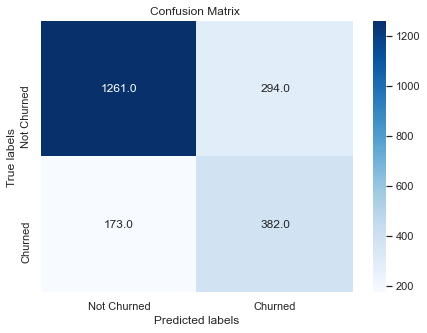

In [42]:
import seaborn as sns
labels = ['Not Churned', 'Churned']

plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(confusion_matrix_log,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ');

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

y_pred_log=best_lr1.predict(X_test)
y_score_log = best_lr1.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr, tpr)
print(roc_auc_log)

0.8344491758639668


## Auc curves for logistic regression

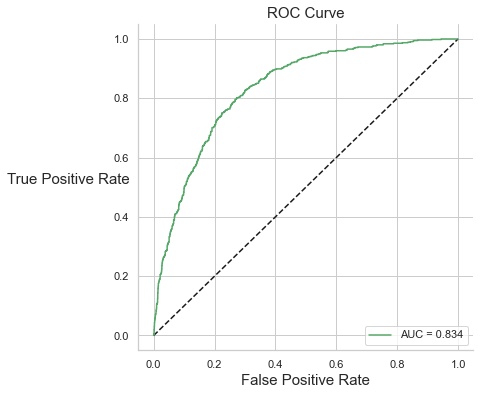

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

logit_roc_auc = roc_auc_score(y_test, best_lr1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_lr1.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))


# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,'g',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.title('ROC Curve',fontsize = 15)
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
despine()

## Optimal Threshold

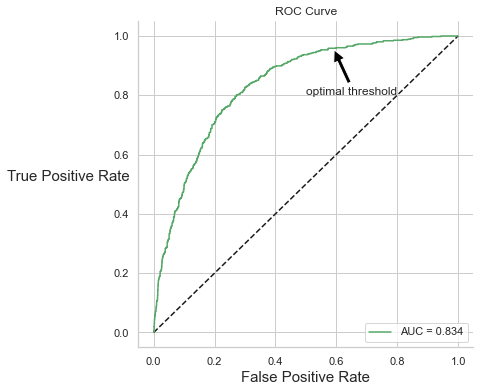

In [45]:
logit_roc_auc = roc_auc_score(y_test, best_lr1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_lr1.predict_proba(X_test)[:,1])

roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6,6))


# Plotting our Baseline..
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, 'g',label='AUC = %0.3f'% roc_auc)
plt.annotate('optimal threshold', xy=(0.59, 0.96), xytext=(0.5, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate',fontsize = 15)
plt.ylabel('True Positive Rate',rotation=0,labelpad=45,fontsize = 15)
despine()

# Svm model

In [46]:
# Finding best parameters for rbf kernel.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train_res,y_train_res,5)

{'C': 10, 'gamma': 0.01}

In [47]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm2.fit(X_train_res, y_train_res)

SVC(gamma=0.001)

In [48]:
# predict out of sample
y_pred1 = model_svm2.predict(X_test)

In [49]:
cm_svm_rbf=confusion_matrix(y_test,y_pred1)
print(cm_svm_rbf)

[[1134  421]
 [ 169  386]]


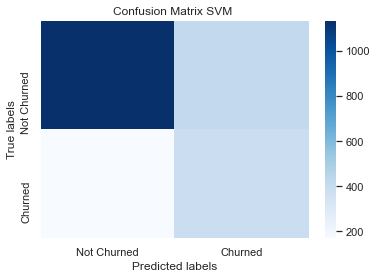

In [50]:
labels = ['Not Churned', 'Churned']
ax= plt.subplot()
sns.heatmap(cm_svm_rbf,cmap="Blues", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM ');

## Linear kernel

In [ ]:
# Finding best parameters for linear kernel.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train_res,y_train_res,5)

In [ ]:
model_svm1 = svm.SVC(kernel='linear', gamma = 0.001) #Gamma is the free parameter of the Gaussian radial basis function.
model_svm1.fit(X_train_res, y_train_res)

In [ ]:
# predict out of sample
y_pred1 = model_svm2.predict(X_test)

In [ ]:
cm_svm_linear=confusion_matrix(y_test,y_pred1)
print(cm_svm_linear)

In [ ]:
labels = ['Not Churned', 'Churned']
ax= plt.subplot()
sns.heatmap(cm_svm_rbf,cmap="Blues", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM (linear) ');

## Knn model

In [ ]:
rom sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# define the parameter values that should be searched
k_range = list(range(1, 100))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# scalarizing X_train and X_test
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#fit the grid
#grid.fit(X_train, y_train)

In [ ]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
 train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=79, weights='uniform')
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
y_pred_knn=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
cm_knn=confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

 # Printing the classification report

In [ ]:
print(classification_report(y_test, y_pred_knn))

## Area under curve

In [ ]:
y_pred_knn=knn.predict(X_test)
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr,_ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr, tpr)
print(roc_auc_knn)

## plotting the confusion matrix

In [ ]:
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN ');

## Roc curves of all model tried

In [ ]:
lr_score=best_lr1.predict_proba(X_test)[:,1]
rfc_score = rfc_best.predict_proba(X_test)[:,1]
#svm_score = model_svm1.predict_proba(xtest)[:,1]
knn_score = knn.predict_proba(X_test)[:,1]

#l_svm_score = l_svm.predict_proba(xtest)[:,1]

lr_fpr, lr_tpr,_ = roc_curve(y_test, lr_score)
rfc_fpr, rfc_tpr,_ = roc_curve(y_test, rfc_score)
#svm_fpr, svm_tpr,_ = roc_curve(ytest, svm_score)
knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(rfc_fpr,rfc_tpr, label = 'RandomForrests')
plt.plot(knn_fpr,knn_tpr, label = 'KNN K = 15')
#plt.plot(l_svm_fpr,l_svm_tpr, label = 'SVM-Linear')

plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize = '15')
plt.ylabel('True Positive Rate', fontsize = '15')
plt.title('Roc Curves', fontsize = '15')
despine()

plt.savefig('RocCurve')

## Calculating Optimal threshold

## including cost

In [ ]:
def makecost(obs,prob,falsepos_cost,falseneg_cost,truepos_cost):
    def cost(cutoff):
        pred = np.array(prob > cutoff)
        fpos = pred * (1 - obs) 
        fneg = (1 - pred) * obs
        tpos=pred*obs
        return np.sum(fpos * falsepos_cost + fneg * falseneg_cost+ tpos*truepos_cost)
    return np.vectorize(cost)

In [ ]:
cut = np.linspace(0,1,100)
cost = np.zeros_like(cut)
from sklearn.model_selection import KFold, cross_val_predict
obs = np.ravel(y_train)

K = 10
for j in range(K):
    folds = KFold(n_splits=5,shuffle=True)
    prob = cross_val_predict(best_lr1,X_train,obs,cv=folds,method='predict_proba',n_jobs=5)[:,1]
    getcost = makecost(obs,prob,falsepos_cost=100,falseneg_cost=500,truepos_cost=200)
    currentcost = getcost(cut)/X_train.shape[0]
    cost += currentcost
    plt.plot(cut, currentcost,c='C0',alpha=0.05)
cost /= K

plt.plot(cut,cost,c='C0')
plt.xlabel('cutoff',fontsize = 15)
plt.ylabel('Expected cost per data point',labelpad=69,fontsize = 15,rotation=0)
plt.title("Optimal Threshold",fontsize=15)
despine()

In [ ]:
bestcut = cut[np.argmin(cost)]
bestcut

In [ ]:
min(cost)


Finding the tpr and fpr for the optimal threshold

In [ ]:
pd.set_option('display.max_rows', 500)
cutoff_list = pd.DataFrame(np.column_stack([tpr, fpr, thresholds]), 
                               columns=['tpr', 'fpr', 'thresholds'])
cutoff_list

## Finding the optimal threshold without including cost

In [ ]:
# print the first 10 predicted probabilities of class membership
best_lr1.predict_proba(X_test)[0:10]

 Row: observation

Each row, numbers sum to 1

Column: class

2 response classes there 2 columns

column 0: predicted probability that each observation is a member of class 0 column 1: predicted probability that each observation is a member of class 1

Importance of predicted probabilities

We can rank observations by probability of a customer churning

Prioritize contacting those with a higher probability

There is a 0.5 classification threshold

Class 1 is predicted if probability > 0.5

Class 0 is predicted if probability < 0.5

In [ ]:
# store the predicted probabilities for class 1 (ie customer will churn)
y_pred_prob = best_lr1.predict_proba(X_test)[:, 1]

In [ ]:

#Plot predicted probablities for class1
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of a Customer Churning')
plt.ylabel('Frequency')
despine()

## Observation

1.Most of observations have probability from between 0.1 and 0.2

2.Small number of observations with probability > 0.5

3.Most would be predicted "no churners" in this case

Solution

1.Decrease the threshold for predicting churners

2.Increase the sensitivity of the classifier

3.This would increase the number of TP

4.More sensitive to customers who churn

In [ ]:
# predict churners if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.2 and 0 otherwise
y_pred_class = binarize([y_pred_prob], 0.4)[0]


In [ ]:
y_pred_prob


In [ ]:
y_pred_class[0:10]

## Confusion Matrix with Optimal Threshold

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
cm_optimal_threshold=confusion_matrix(y_test, y_pred_class)
print(cm_optimal_threshold)

In [ ]:
y_pred_log = best_lr1.predict(X_test)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix_log)

## COST EVALUATION

There are costs associated with the model erroneously assigning false positives and false negatives. It is also important to look at similar costs associated with correct predictions of true positives and true negatives. Because the choice of the threshold affects all four of these statistics,it is important to consider the relative costs to the business for each of these four outcomes for each prediction.

What are the costs for my problem of customer churn?I will make some assumptions here.

1. I will assign the true negatives the cost of USD 0. My model essentially correctly identified a happy customer in this case, and I don’t need to do anything.

2. False negatives are the most problematic, because they incorrectly predict that a churning customer will stay. I will lose the customer and will have to pay all the costs of acquiring a replacement customer, including foregone revenue, advertising costs, administrative costs, point of sale costs. A quick search on the Internet reveals that such costs typically run in the hundreds of dollars so, for the purposes of this post, I will assume USD 500. This is the cost of false negatives.

3. Finally, for customers that my model identifies as churning, I will assume a retention incentive in the amount of USD 100.This is the cost of both true positive and false positive outcomes.In the case of false positives (the customer is happy,but the model mistakenly predicted churn),I will “waste” the USD 100 concession.

It’s clear that false negatives are substantially more costly than false positives. Instead of optimizing for total error, I should be minimizing a cost function that looks like this:

500∗FN(C)+0TN(C) + 100∗FP(C)+100TP(C)

C:Count

In [ ]:
no_churn = (y_test['Churn'] == 0).sum()
yes_churn=(y_test['Churn'] == 1).sum()
print("Not Churned:",no_churn)
print("Yes Churned:",yes_churn)